In [1]:
!pip install numpy pandas scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [28]:
df = pd.read_csv('Student_Marks.csv')
print(df.head(5))

   number_courses  time_study   Marks
0               3       4.508  19.202
1               4       0.096   7.734
2               4       3.133  13.811
3               6       7.909  53.018
4               8       7.811  55.299


In [29]:
X_single = df[['number_courses']]
y_single = df['Marks']

In [30]:
x_train_single, x_test_single, y_train_single, y_test_single = train_test_split(
    X_single, y_single,
    test_size=0.2,
    random_state=42)

In [31]:
lr_single = LinearRegression()
#train the model
lr_single.fit(x_train_single, y_train_single)
#predict
y_pred_single = lr_single.predict(x_test_single)

In [32]:
r2_single = r2_score(y_test_single, y_pred_single)
print(r2_single)
print(lr_single.intercept_)
print(lr_single.coef_)

0.17149512153068136
8.782796222907185
[2.76230951]


In [33]:
model = lr_single

example = [10]
model.predict([example]).round(2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([36.41])

In [35]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Suppose df is your full DataFrame
# Define x_val and y_val to refer to the columns you want
x_val = df[['number_courses']]             # a DataFrame with one column
y_val = df[['Marks']]       # also a DataFrame/Series

# Now, create updatedX and predicted y based on your model (e.g., lr_single)
updatedX = np.array(x_val['number_courses'])
y_predict = lr_single.predict(x_val)  # call predict on the same shape as training

# Create your reference line
reference_line = go.Scatter(
    x=updatedX,
    y=y_predict,
    mode="lines",
    line=go.scatter.Line(color="blue"),
    showlegend=False
)

# Create a scatter plot of the actual data
fig = px.scatter(
    x=x_val['number_courses'],
    y=y_val['Marks']
)

# Add your reference (predicted) line to the plot
fig.add_trace(reference_line)

# Display
fig.show()

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [37]:
X_multi = df[['number_courses','time_study']]
y_multi = df['Marks']

In [38]:
x_train_multi, x_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi,
    test_size=0.2,
    random_state=42)

In [39]:
x_train_multi.shape,x_test_multi.shape

((80, 2), (20, 2))

In [40]:
lr_multi = LinearRegression()
#train the model
lr_multi.fit(x_train_multi, y_train_multi)
#predict
y_pred_multi = lr_multi.predict(x_test_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)
print(r2_multi)
print(lr_multi.intercept_)
print(lr_multi.coef_)

0.9459936100591213
-6.613046733912952
[1.87154988 5.16987176]


In [44]:
model = lr_multi
example = [[30,2]]
model.predict(example).round(2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([59.87])

In [45]:
import pickle
#Saves trained model so dont need to train again
pickle.dump(model, open("model.pkl", "wb"))

In [46]:
from google.colab import files

# Download the file locally
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
%%writefile app.py
import streamlit as st
import sklearn
import pickle

model = pickle.load(open("model.pkl", "rb"))

st.title("IceCream Revenue")
st.markdown(
    "The dataset contains modifications with regards to the original for illustrative & learning purposes"
)

temperature = st.slider('Define Temperature?', 0, 50, 20)
#accommodates = st.slider('How many people does the listing accommodate?', 1, 16, 2)
#instant_bookable = st.radio(
    #"Is the listing instantly bookable?",
    #("True", "False"))
#instant_bookable = 1 if instant_bookable == "True" else 0

user_input = [[temperature]]#, accommodates, instant_bookable]]

if st.button('Predict?'):
    st.write("The model predicts that the average tip for this listing is:", model.predict(user_input).round(2))

Writing app.py


In [48]:
%%writefile requirements.txt
pandas
streamlit
plotly
numpy
scikit-learn

Writing requirements.txt


In [49]:
from google.colab import files

# Download the file locally
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
from google.colab import files

# Download the file locally
files.download('app.py')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Correlation Matrix:
                number_courses  time_study     Marks
number_courses        1.000000    0.204844  0.417335
time_study            0.204844    1.000000  0.942254
Marks                 0.417335    0.942254  1.000000


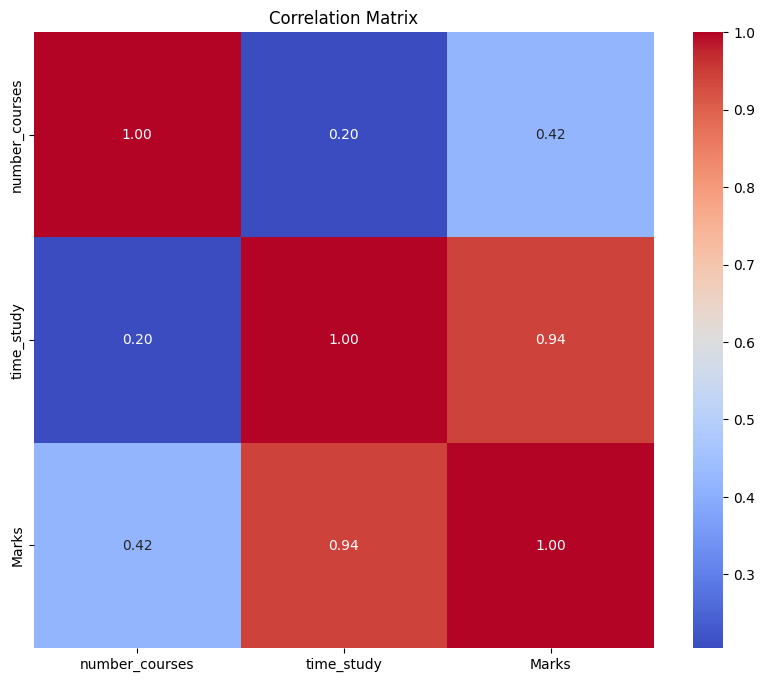

In [52]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Load your dataset (adjust the filename and path as needed)
df = pd.read_csv("Student_Marks.csv")

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix in the console
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# For example, suppose you want to explore these variables:
# 'room', 'amenities', 'accommodates', and 'price_in_dollar'
# Adjust these column names according to your dataset
dimensions = ["number_courses", "Marks", "time_study"]

# Generate the scatter plot matrix
fig = px.scatter_matrix(
    df,
    dimensions=dimensions,
    title="Scatter Plot Matrix (SPLOM) for Selected Variables",
    labels={col: col.capitalize() for col in dimensions}  # Optional: prettify labels
)

# Display the interactive SPLOM
fig.show()

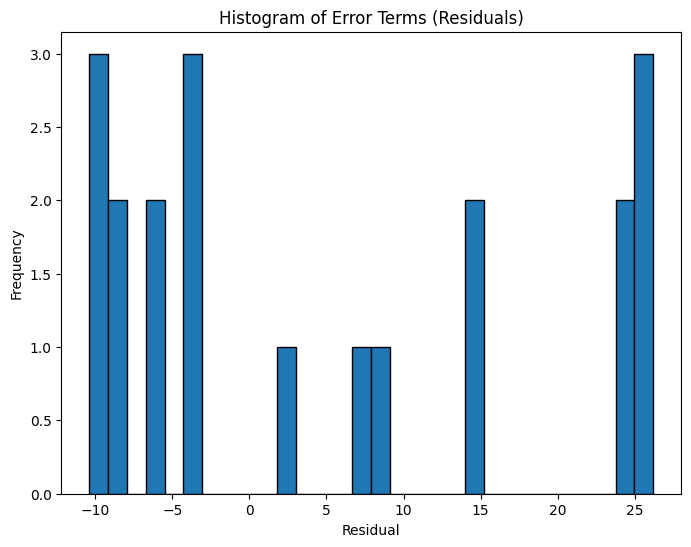

Residual Standard Error (RSE): 15.55818683026321


In [53]:
import matplotlib.pyplot as plt
y_pred_single = lr_single.predict(x_test_single)
residuals = y_test_single - y_pred_single

# Plot a histogram of the error terms
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Error Terms (Residuals)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Sum of Squared Residuals (SSR)
SSR = np.sum(residuals**2)

# Number of observations and predictors
n = len(y_test_single)
p = x_test_single.shape[1]  # For a simple linear regression, p = 1

# Calculate Residual Standard Error (RSE)
# Degrees of freedom: (n - p - 1)
RSE = np.sqrt(SSR / (n - p - 1))

print("Residual Standard Error (RSE):", RSE)